## **Regresión básica / Ejercicio de Regresión 1 (Core)**
**Objetivo**
 
Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python


**Descripción del problema:** Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

**Instrucciones:**

**Carga de datos:** Descarga el archivo de datos house_prices.csv que contiene las siguientes 
 
**columnas:** 

**SqFt:** Tamaño de la casa en pies cuadrados.

**Bedrooms:** Número de habitaciones.

**Bathrooms:** Número de baños.

**price:** Precio de venta de la casa.

**Exploración de datos:** Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

**Preparación de datos:** Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

**Entrenamiento del modelo:** Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

**Evaluación del modelo:** Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

**Predicción:** Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:

**Tamaño:** 2000 pies cuadrados

**Habitaciones:** 3

**Baños:** 2

In [19]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.head(10)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [21]:
# 3. Comprobar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())


Valores nulos en cada columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None

Estadísticas descriptivas:
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000

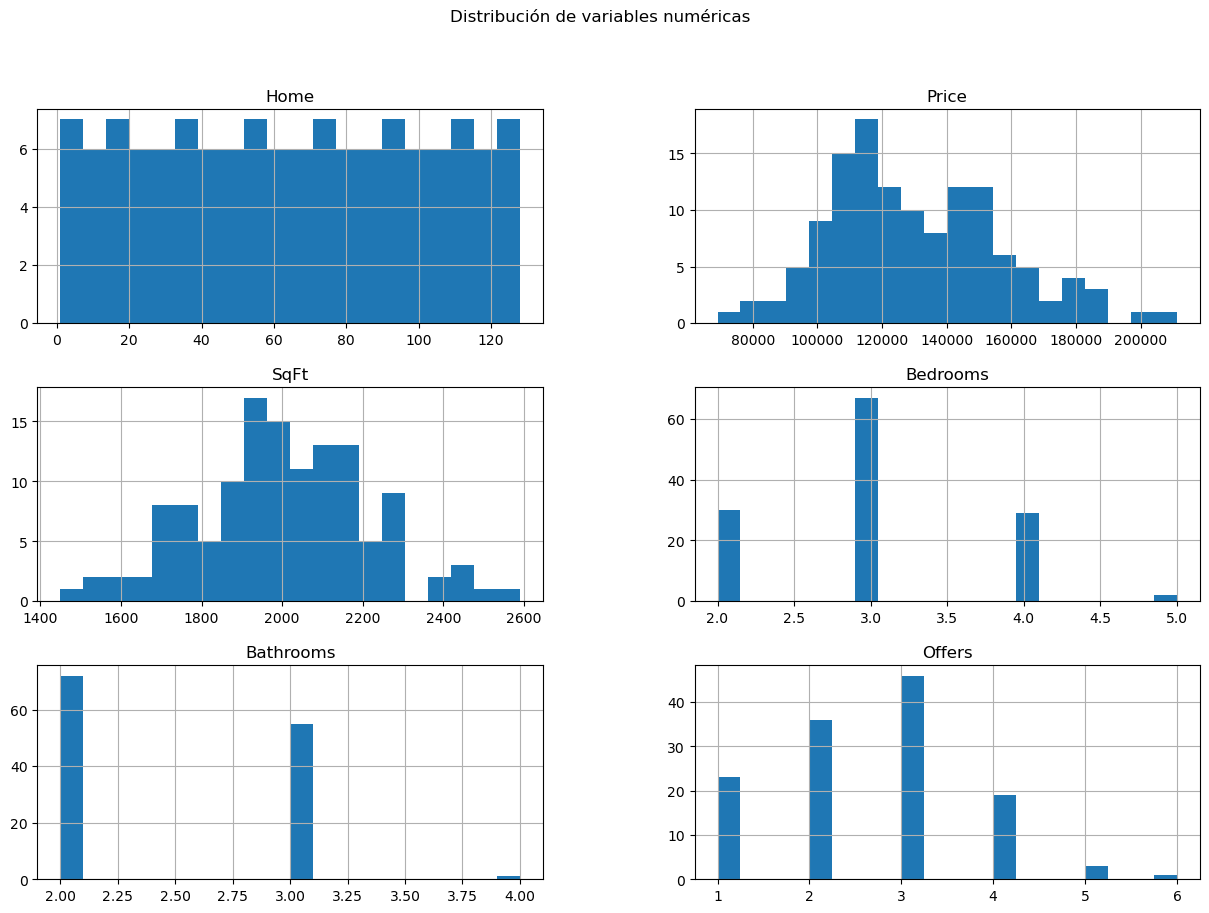

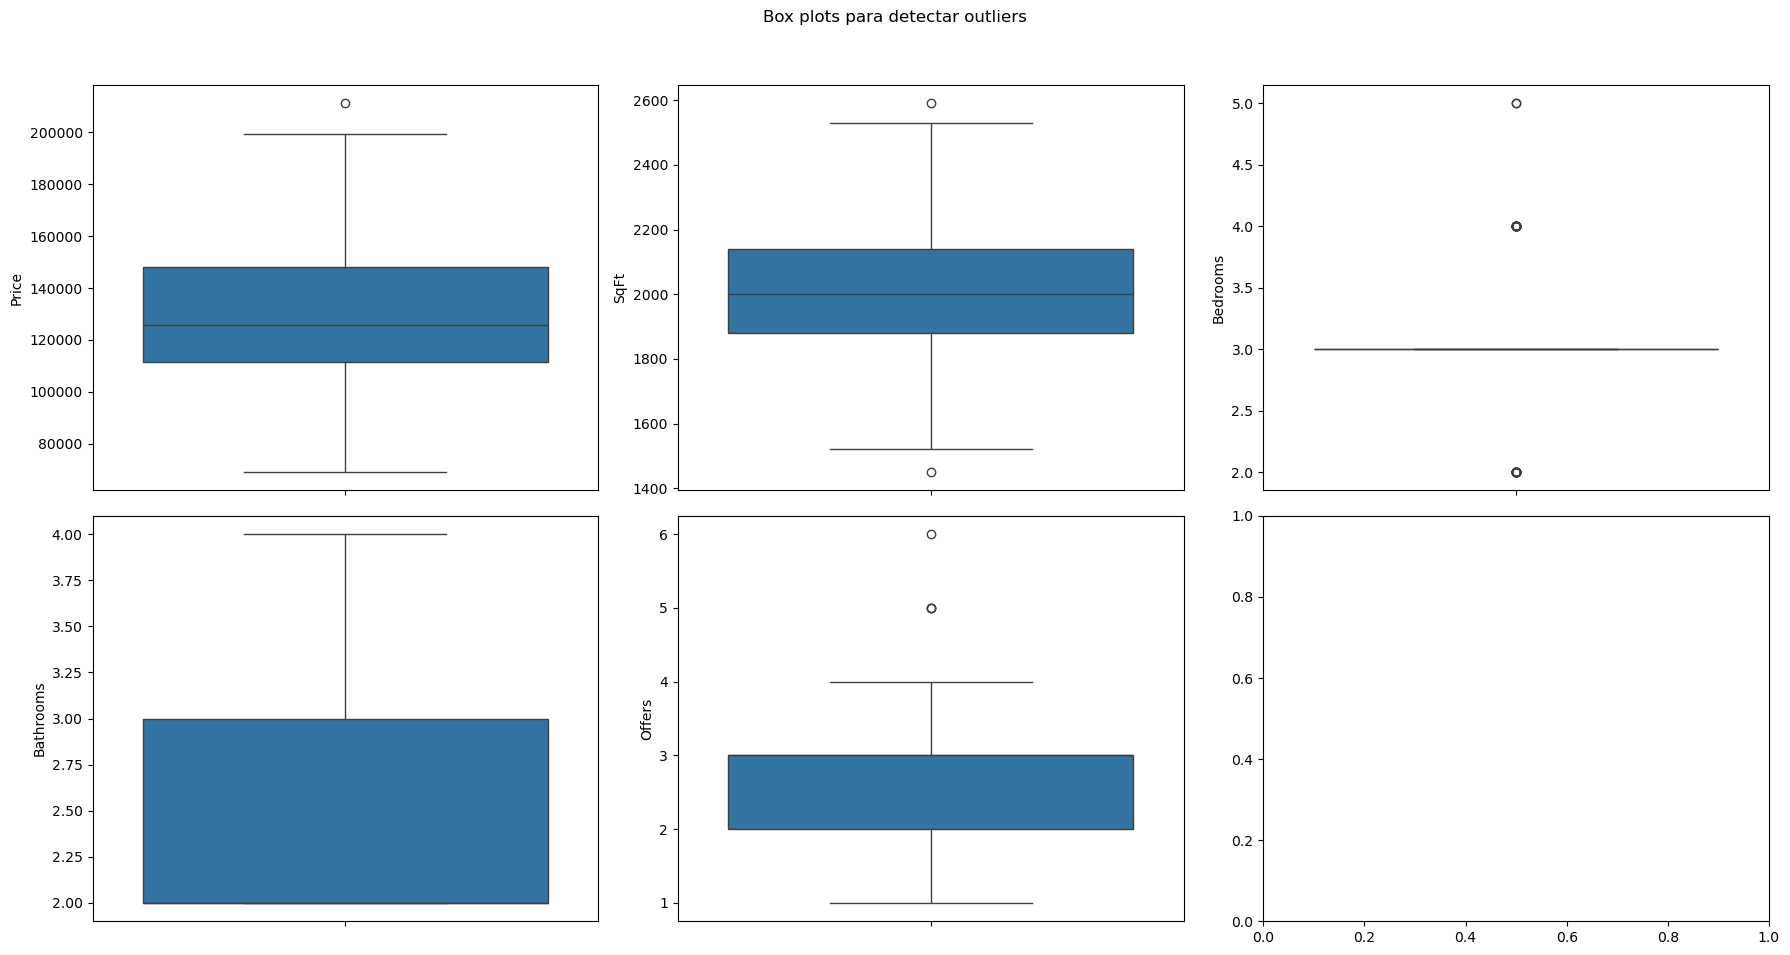

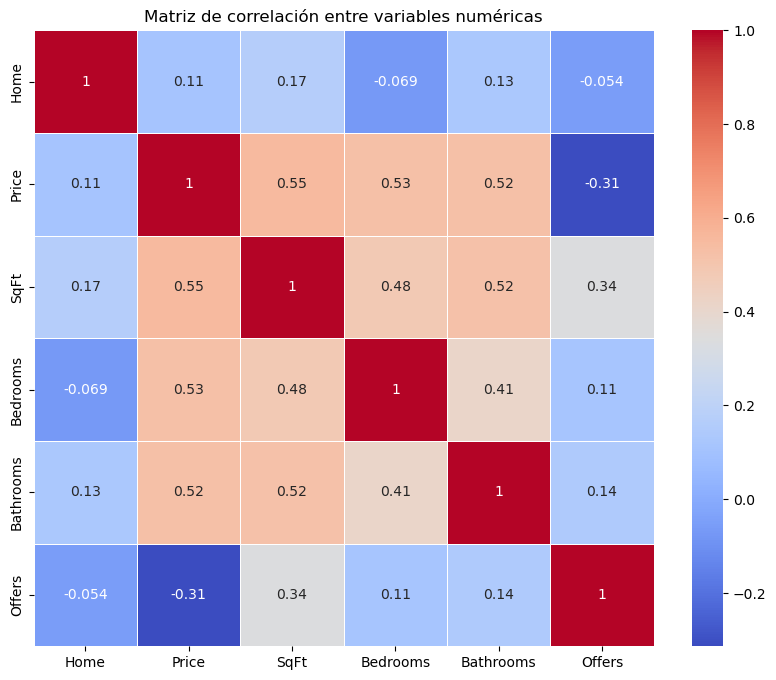


Distribución de valores en columnas categóricas:
Brick
No     86
Yes    42
Name: count, dtype: int64
Neighborhood
East     45
North    44
West     39
Name: count, dtype: int64


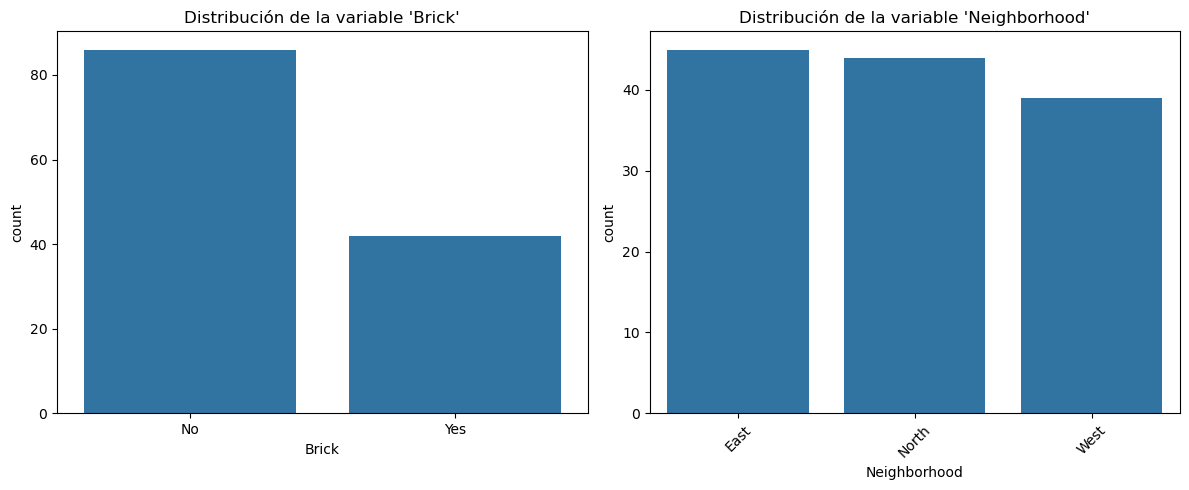

In [22]:
# 1. Información general del DataFrame
print("Información general del DataFrame:")
print(df.info())

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# 3. Comprobar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

# 4. Visualización de la distribución de datos
# Histograma para cada columna numérica
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas")
plt.show()

# 5. Gráficos de caja (box plots) para detectar outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Box plots para detectar outliers")

sns.boxplot(data=df, y="Price", ax=axes[0, 0])
sns.boxplot(data=df, y="SqFt", ax=axes[0, 1])
sns.boxplot(data=df, y="Bedrooms", ax=axes[0, 2])
sns.boxplot(data=df, y="Bathrooms", ax=axes[1, 0])
sns.boxplot(data=df, y="Offers", ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Seleccionar solo las columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])

# 6. Análisis de correlación para las variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# 7. Análisis de variables categóricas (Brick y Neighborhood)
print("\nDistribución de valores en columnas categóricas:")
print(df['Brick'].value_counts())
print(df['Neighborhood'].value_counts())

# Gráfico de barras para visualizar la distribución de las categorías
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Brick', data=df)
plt.title("Distribución de la variable 'Brick'")

plt.subplot(1, 2, 2)
sns.countplot(x='Neighborhood', data=df)
plt.title("Distribución de la variable 'Neighborhood'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


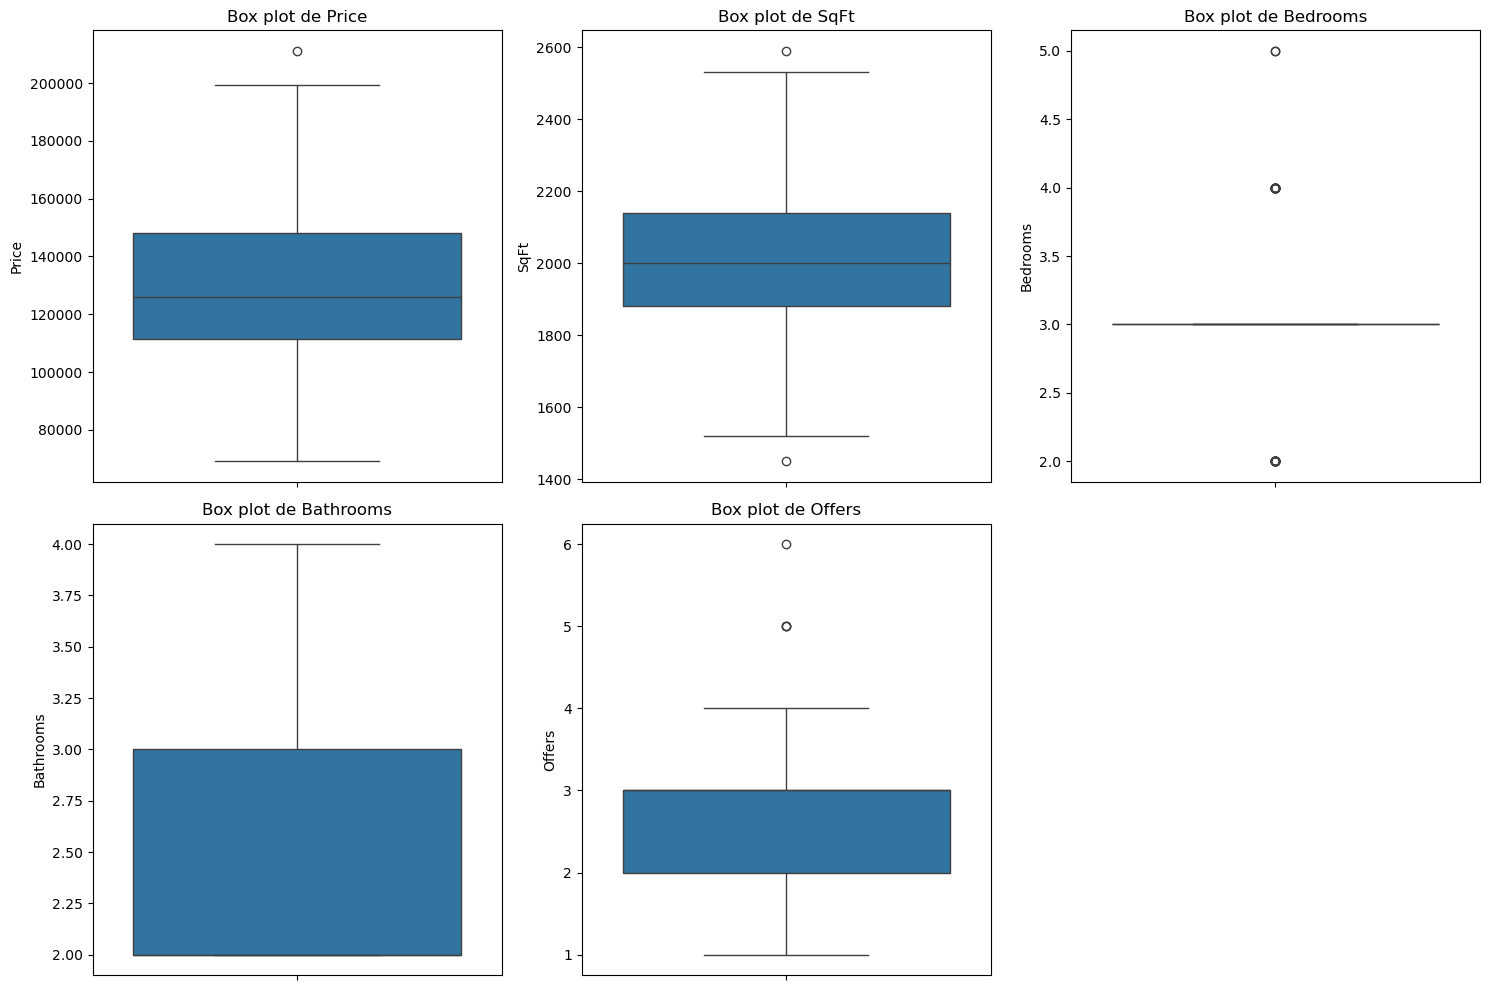

In [23]:
# Box plot para cada columna numérica para detectar outliers
numeric_columns = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot de {col}')
plt.tight_layout()
plt.show()


In [24]:
# Detectar outliers en cada columna numérica usando el rango intercuartílico
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"\nVariable: {col}")
    print(f"Cantidad de outliers: {len(outliers)}")
    print(outliers[[col]])



Variable: Price
Cantidad de outliers: 1
      Price
103  211200

Variable: SqFt
Cantidad de outliers: 2
    SqFt
14  2590
65  1450

Variable: Bedrooms
Cantidad de outliers: 61
     Bedrooms
0           2
1           4
7           4
8           4
11          2
..        ...
119         2
120         2
122         2
124         4
125         2

[61 rows x 1 columns]

Variable: Bathrooms
Cantidad de outliers: 0
Empty DataFrame
Columns: [Bathrooms]
Index: []

Variable: Offers
Cantidad de outliers: 4
     Offers
13        5
47        6
100       5
101       5


In [25]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns='Price')  # Asumiendo que 'Price' es la variable objetivo
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada conjunto
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (102, 7)
Tamaño del conjunto de prueba: (26, 7)


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crear una instancia del OneHotEncoder, configurando drop='first' para evitar multicolinealidad
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Cambio aquí: sparse -> sparse_output

# Aplicar la transformación a las columnas categóricas 'Brick' y 'Neighborhood'
column_transformer = ColumnTransformer(
    transformers=[
        ('brick_neighborhood', encoder, ['Brick', 'Neighborhood'])
    ], 
    remainder='passthrough'  # Mantener las demás columnas numéricas sin cambios
)

# Transformar los datos
X_encoded = column_transformer.fit_transform(X)

# Convertir el resultado en un DataFrame
# Los nombres de las nuevas columnas serán generados automáticamente, por lo que ajustamos el índice de las columnas
encoded_columns = column_transformer.transformers_[0][1].get_feature_names_out(['Brick', 'Neighborhood'])
encoded_X = pd.DataFrame(X_encoded, columns=encoded_columns.tolist() + [col for col in X.columns if col not in ['Brick', 'Neighborhood']])

# Dividir los datos de nuevo en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar los coeficientes y la intercepción del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepción del modelo:", modelo.intercept_)


Coeficientes del modelo: [ 1.68353053e+04  1.60280751e+03  2.20299153e+04 -1.41393179e+01
  6.01926115e+01  3.50842091e+03  7.11446346e+03 -8.68296453e+03]
Intercepción del modelo: -7329.448178179751


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Calcular el R² (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)
print(f"R-cuadrado (R²): {r2}")


Error Cuadrático Medio (MSE): 114251135.7173241
R-cuadrado (R²): 0.8061565137761053


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


path = '../../data/ml/house-prices.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.head(10)

# Características (X) y target (y)
X = df.drop(columns='Price')  # Se asume que 'Price' es la variable objetivo
y = df['Price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los transformadores para las columnas
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']),  # Normalizar columnas numéricas
        ('cat', OneHotEncoder(), ['Brick', 'Neighborhood'])  # Codificar columnas categóricas
    ])

# Ajustar el ColumnTransformer con los datos de entrenamiento
column_transformer.fit(X_train)

# Transformar los conjuntos de entrenamiento y prueba
X_train_transformed = column_transformer.transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_transformed, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test_transformed)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R-cuadrado (R²): {r2}')

# Supongamos que tenemos nuevas características para predecir el precio de una casa
# Creamos un DataFrame con esas características (ajusta según tus datos)
nuevas_caracteristicas = {
    'SqFt': [1800],
    'Bedrooms': [3],
    'Bathrooms': [2],
    'Offers': [2],
    'Brick': ['No'],
    'Neighborhood': ['East']
}

df_nueva_casa = pd.DataFrame(nuevas_caracteristicas)

# Transformar las nuevas características con el ColumnTransformer ajustado
X_nueva_casa = column_transformer.transform(df_nueva_casa)

# Realizar la predicción con el modelo entrenado
precio_predicho = modelo.predict(X_nueva_casa)

print(f'Precio predicho para la nueva casa: {precio_predicho[0]}')



Error Cuadrático Medio (MSE): 114170418.4545384
R-cuadrado (R²): 0.8062934622232134
Precio predicho para la nueva casa: 107668.85950739398
